## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [7]:
!pip3 install -U ucimlrepo 

In [13]:
# TODO
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Načítanie datasetu
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Získanie features (X) a targets (y)
X = heart_failure_clinical_records.data.features  # pandas DataFrame
y = heart_failure_clinical_records.data.targets  # pandas DataFrame

# Spojenie features a target do jedného DataFrame
data_hf = pd.concat([X, y], axis=1)

# Zobrazenie prvých 5 riadkov
print(data_hf.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
0        0     4            1  
1        0     6            1  
2       

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [14]:
num = data_hf.isnull().sum() # vyzerá že nemá chýbajúce hodnoty
print(num)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [18]:
print(data_hf.dtypes)
# age = float64, anaemia = int64, high_blood_pressure = int64, serum_sodium = int64, death_event = int64
#kontrola hodnôt unikátnych
print(data_hf["age"].unique()) 
#[75.    55.    65.    50.    90.    60.    80.    62.    45.    49. 82.    87.    70.    48.    68.    53.    95.    58.    94.    85. 69.    72.    51.    57.    42.    41.    67.    79.    59.    44. 63.    86.    66.    43.    46.    61.    81.    52.    64.    40. 60.667 73.    77.    78.    54.    47.    56.   ]
print(data_hf["anaemia"].unique()) # [1,0] obsahuje takže kvázy boolean by to mohol byť
print(data_hf["high_blood_pressure"].unique()) # [1,0] obsahuje takže kvázy boolean by to mohol byť
print(data_hf["serum_sodium"].unique()) 
# [130 136 129 137 116 132 131 138 133 140 127 121 135 134 144 128 145 142 139 146 141 143 126 124 113 125 148]
print(data_hf["death_event"].unique()) # [1,0] obsahuje takže kvázy boolean by to mohol byť
# po podrobnej analýze by sme mohli povedať že age a serum_sodium sú numerické premenné a zvyšok su kategorizačné lebo sú len kvázy boolean


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
dtype: object
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
[0 1]
[1 0]
[130 136 129 137 116 132 131 138 133 140 127 121 135 134 144 128 145 142
 139 146 141 143 126 124 113 125 148]
[1 0]


**Obsahuje dataset duplicitné záznamy?**

In [19]:
print(data_hf.duplicated().sum())  # Počet duplicitných riadkov je 0

0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [21]:
# TODO
sex_hf = data_hf["sex"]
sex_hf.head()

0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: int64

**Koľko záznamov mužov a žien obsahuje dataset?**

In [26]:
print(sex_hf.value_counts().rename(index={0: "Ženy", 1: "Muži"})) # Muži    194 Ženy    105

sex
Muži    194
Ženy    105
Name: count, dtype: int64


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [25]:
nefajciari_podla_pohlavia = data_hf[data_hf["smoking"] == 0]["sex"].value_counts().rename(index={0: "Ženy", 1: "Muži"})
print(nefajciari_podla_pohlavia) #Muži    102 Ženy    101

sex
Muži    102
Ženy    101
Name: count, dtype: int64


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [28]:
# TODO
data_hf["age"].head() # je typu float lebo obsahuje desatinné čisla aj

0    75.0
1    55.0
2    65.0
3    50.0
4    65.0
Name: age, dtype: float64

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [31]:
print(data_hf["age"].min()) # 40.0 je minimálny vek
print(data_hf["age"].max()) # 95.0 je maximálny vek
print(data_hf["age"].mean()) # 60.83389297658862 je priemerný vek

40.0
95.0
60.83389297658862


**Z akého veku je v datasete najviac záznamov?**

In [40]:
age_counts = data_hf["age"].value_counts()
print(age_counts)
most_common_age = age_counts.idxmax()
most_common_age_count = age_counts.max()

print(f"Vek s najväčším počtom záznamov: {most_common_age} (Počet záznamov: {most_common_age_count})")
# Vek s najväčším počtom záznamov: 60.0 (Počet záznamov: 33)

age
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
68.000     5
62.000     5
52.000     5
61.000     4
49.000     4
73.000     4
51.000     4
59.000     4
69.000     3
46.000     3
82.000     3
90.000     3
64.000     3
48.000     2
78.000     2
95.000     2
57.000     2
54.000     2
77.000     2
67.000     2
66.000     2
44.000     2
60.667     2
87.000     1
79.000     1
41.000     1
94.000     1
86.000     1
81.000     1
43.000     1
47.000     1
56.000     1
Name: count, dtype: int64
Vek s najväčším počtom záznamov: 60.0 (Počet záznamov: 33)


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

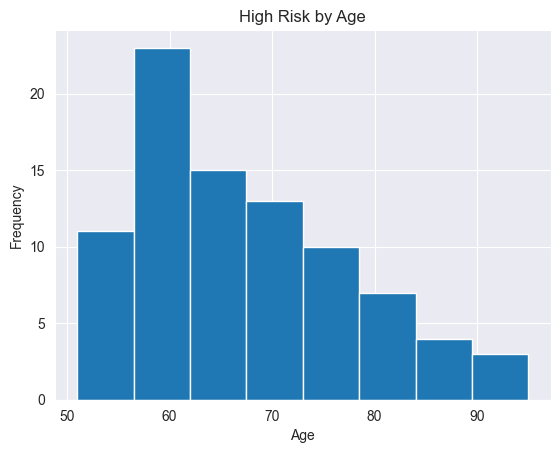

In [41]:
import matplotlib.pyplot as plt
data_hw = data_hf
# Add the 'risk' variable
data_hw['risk'] = data_hw.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hw[data_hw['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

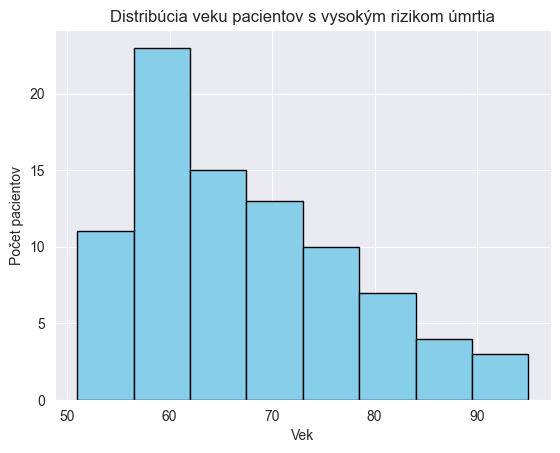

In [43]:
# TODO
import matplotlib.pyplot as plt
high_risk = data_hw[data_hw['risk'] == 'High']
plt.hist(high_risk['age'], bins= 'auto', color='skyblue', edgecolor='black')  
plt.title('Distribúcia veku pacientov s vysokým rizikom úmrtia')
plt.xlabel('Vek')
plt.ylabel('Počet pacientov')
plt.show()


**V akom veku je riziko zlyhania srdca najväčšie?**

In [44]:
age_risk_counts = high_risk['age'].value_counts()
most_common_age_high_risk = age_risk_counts.idxmax()
most_common_age_high_risk_count = age_risk_counts.max()

print(f"Vek s najväčším počtom pacientov s vysokým rizikom: {most_common_age_high_risk} (Počet pacientov: {most_common_age_high_risk_count})")
#Vek s najväčším počtom pacientov s vysokým rizikom: 60.0 (Počet pacientov: 18)


Vek s najväčším počtom pacientov s vysokým rizikom: 60.0 (Počet pacientov: 18)


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [47]:
count_in_age_category = data_hf[data_hf['age'] == most_common_age_high_risk].shape[0]
count_in_age_category2 = data_hw[data_hf['age'] == most_common_age_high_risk].shape[0]
print(f"Počet záznamov v vekovej kategórii {most_common_age_high_risk}: {count_in_age_category}")
print(f"Počet záznamov v vekovej kategórii {most_common_age_high_risk}: {count_in_age_category2}")
#Počet záznamov v vekovej kategórii 60.0: 33
#ale keby rátame dataset iba s high risk tak 18


Počet záznamov v vekovej kategórii 60.0: 33
Počet záznamov v vekovej kategórii 60.0: 33


### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


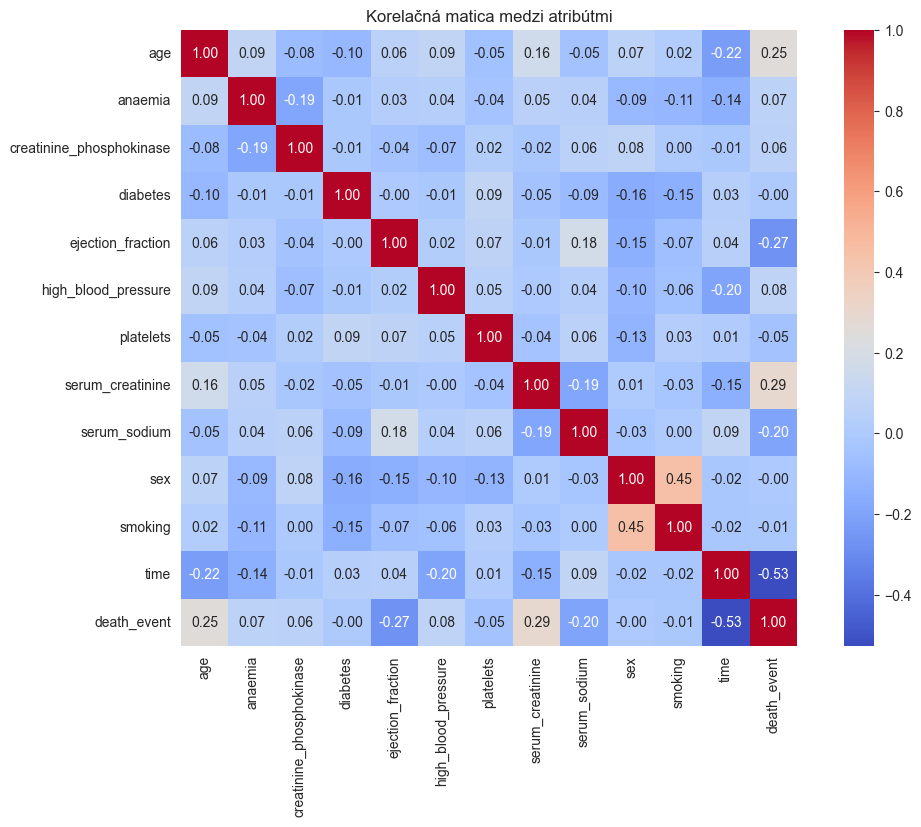

Najväčšie záporné korelácie:
death_event         -0.526964
time                -0.526964
ejection_fraction   -0.268603
age                 -0.224068
dtype: float64

Najväčšia kladná korelácia:
age        1.0
anaemia    1.0
dtype: float64


In [55]:
# TODO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Odstránenie nenumerických atribútov
numerical_data = data_hw.select_dtypes(include=['float64', 'int64'])

# Vytvorenie korelačnej matice
correlation_matrix = numerical_data.corr()

# Vizualizácia korelačnej matice pomocou heatmapy
plt.figure(figsize=(12, 8))  # Nastavenie veľkosti obrázku
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Korelačná matica medzi atribútmi")
plt.show()


# Získame absolútne hodnoty korelácie a odstránime diagonálnu časť matice (koreláciu sám so sebou)
correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))

# Najväčšie záporné korelácie (najnižšie hodnoty)
negative_correlations = correlation_matrix_no_diag.min().sort_values()

# Najväčšie kladné korelácie (najvyššie hodnoty)
positive_correlations = correlation_matrix.max().sort_values(ascending=False)
positive_correlations2 = correlation_matrix_no_diag.max().sort_values()

# Výpis najväčších záporných a kladných korelácií
print("Najväčšie záporné korelácie:")
print(negative_correlations.head(4))  # Prvé dve záporné korelácie

print("\nNajväčšia kladná korelácia:")
print(positive_correlations.head(2))  # Prvá kladná korelácia


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure